In [39]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
df=pd.read_csv("5factors and new cases.csv")
df

,Date,TemperatureMAX,TemperatureAVG,TemperatureMIN,DewPointMAX,DewPointAVG,DewPointMIN,HumidityMAX,HumidityAVG,HumidityMIN,WindspeedMAX,WindspeedAVG,WindspeedMIN,PressureMAX,PressureAVG,PressureMIN,COVIDCASES
0,1/29/2020,24,20,15,55,51.3,45,77,58.5,34,15,6.3,3,30.1,30.1,30.0,4.0
1,1/30/2020,22,20,16,55,52.2,46,77,59.4,41,14,6.9,2,30.1,30.1,30.0,0.0
2,1/31/2020,23,18,14,55,53.0,50,88,65.6,47,12,5.8,3,30.1,30.0,30.0,0.0
3,2/1/2020,24,19,15,52,50.0,43,72,55.7,31,15,6.5,2,30.1,30.0,30.0,0.0
4,2/2/2020,23,20,17,61,53.5,45,83,61.1,36,13,6.3,1,30.1,30.1,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,5/21/2021,39,35,30,79,64.8,52,66,38.5,22,14,6.9,2,29.6,29.6,29.6,1490.0
479,5/22/2021,41,36,30,75,63.4,41,53,35.4,11,14,6.5,1,29.6,29.6,29.5,1596.0
480,5/23/2021,45,36,31,79,61.7,27,66,36.9,5,18,7.2,0,29.6,29.6,29.5,1591.0
481,5/24/2021,44,37,31,75,62.4,50,47,32.1,14,17,8.7,0,29.7,29.6,29.6,1512.0


In [7]:
df.head()

,Date,TemperatureMAX,TemperatureAVG,TemperatureMIN,DewPointMAX,DewPointAVG,DewPointMIN,HumidityMAX,HumidityAVG,HumidityMIN,WindspeedMAX,WindspeedAVG,WindspeedMIN,PressureMAX,PressureAVG,PressureMIN,COVIDCASES
0,1/29/2020,24,20,15,55,51.3,45,77,58.5,34,15,6.3,3,30.1,30.1,30.0,4.0
1,1/30/2020,22,20,16,55,52.2,46,77,59.4,41,14,6.9,2,30.1,30.1,30.0,0.0
2,1/31/2020,23,18,14,55,53.0,50,88,65.6,47,12,5.8,3,30.1,30.0,30.0,0.0
3,2/1/2020,24,19,15,52,50.0,43,72,55.7,31,15,6.5,2,30.1,30.0,30.0,0.0
4,2/2/2020,23,20,17,61,53.5,45,83,61.1,36,13,6.3,1,30.1,30.1,30.0,1.0


In [8]:
df.columns

Index(['Date', 'TemperatureMAX', 'TemperatureAVG', 'TemperatureMIN',
       'DewPointMAX', 'DewPointAVG ', 'DewPointMIN ', 'HumidityMAX ',
       'HumidityAVG ', 'HumidityMIN', 'WindspeedMAX', 'WindspeedAVG ',
       'WindspeedMIN', 'PressureMAX ', 'PressureAVG ', 'PressureMIN ',
       'COVIDCASES'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=483, step=1)

In [10]:
df.values

array([['1/29/2020', 24, 20, ..., 30.1, 30.0, 4.0],
       ['1/30/2020', 22, 20, ..., 30.1, 30.0, 0.0],
       ['1/31/2020', 23, 18, ..., 30.0, 30.0, 0.0],
       ...,
       ['5/23/2021', 45, 36, ..., 29.6, 29.5, 1591.0],
       ['5/24/2021', 44, 37, ..., 29.6, 29.6, 1512.0],
       ['5/25/2021', 44, 36, ..., 29.6, 29.6, nan]], dtype=object)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [159]:
df.shape

(483, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            483 non-null    object 
 1   TemperatureMAX  483 non-null    int64  
 2   TemperatureAVG  483 non-null    int64  
 3   TemperatureMIN  483 non-null    int64  
 4   DewPointMAX     483 non-null    int64  
 5   DewPointAVG     483 non-null    float64
 6   DewPointMIN     483 non-null    int64  
 7   HumidityMAX     483 non-null    int64  
 8   HumidityAVG     483 non-null    float64
 9   HumidityMIN     483 non-null    int64  
 10  WindspeedMAX    483 non-null    int64  
 11  WindspeedAVG    483 non-null    float64
 12  WindspeedMIN    483 non-null    int64  
 13  PressureMAX     483 non-null    float64
 14  PressureAVG     483 non-null    float64
 15  PressureMIN     483 non-null    float64
 16  COVIDCASES      482 non-null    float64
dtypes: float64(7), int64(9), object(1)


In [145]:
df=df.iloc[:,:].values

In [146]:
df

array([[  24. ,   20. ,   15. , ...,   30.1,   30. ,    4. ],
       [  22. ,   20. ,   16. , ...,   30.1,   30. ,    0. ],
       [  23. ,   18. ,   14. , ...,   30. ,   30. ,    0. ],
       ...,
       [  45. ,   36. ,   31. , ...,   29.6,   29.5, 1591. ],
       [  44. ,   37. ,   31. , ...,   29.6,   29.6, 1512. ],
       [  44. ,   36. ,   31. , ...,   29.6,   29.6,    nan]])

In [158]:
df.shape

(483, 16)

In [15]:
df['TemperatureMAX']

0      24
1      22
2      23
3      24
4      23
       ..
478    39
479    41
480    45
481    44
482    44
Name: TemperatureMAX, Length: 483, dtype: int64

In [144]:
df[['TemperatureMAX','TemperatureAVG','TemperatureMIN']]

,TemperatureMAX,TemperatureAVG,TemperatureMIN
0,24,20,15
1,22,20,16
2,23,18,14
3,24,19,15
4,23,20,17
...,...,...,...
478,39,35,30
479,41,36,30
480,45,36,31
481,44,37,31


In [18]:
df.loc[2]

Date              1/31/2020
TemperatureMAX           23
TemperatureAVG           18
TemperatureMIN           14
DewPointMAX              55
DewPointAVG              53
DewPointMIN              50
HumidityMAX              88
HumidityAVG            65.6
HumidityMIN              47
WindspeedMAX             12
WindspeedAVG            5.8
WindspeedMIN              3
PressureMAX            30.1
PressureAVG              30
PressureMIN              30
COVIDCASES                0
Name: 2, dtype: object

In [32]:
df.loc[[2,5]]

,Date,TemperatureMAX,TemperatureAVG,TemperatureMIN,DewPointMAX,DewPointAVG,DewPointMIN,HumidityMAX,HumidityAVG,HumidityMIN,WindspeedMAX,WindspeedAVG,WindspeedMIN,PressureMAX,PressureAVG,PressureMIN,COVIDCASES
2,1/31/2020,23,18,14,55,53.0,50,88,65.6,47,12,5.8,3,30.1,30.0,30.0,0.0
5,2/3/2020,22,19,15,61,51.0,45,88,60.5,38,21,12.2,3,30.1,30.1,30.0,0.0


In [35]:
df.corr()

,TemperatureMAX,TemperatureAVG,TemperatureMIN,DewPointMAX,DewPointAVG,DewPointMIN,HumidityMAX,HumidityAVG,HumidityMIN,WindspeedMAX,WindspeedAVG,WindspeedMIN,PressureMAX,PressureAVG,PressureMIN,COVIDCASES
TemperatureMAX,1.000000,0.971893,0.920065,0.762940,0.581763,0.253197,-0.285308,-0.433116,-0.540610,0.298877,0.142979,-0.065201,-0.856730,-0.832273,-0.119185,-0.380869
TemperatureAVG,0.971893,1.000000,0.975914,0.791157,0.636648,0.359202,-0.316477,-0.418474,-0.428195,0.310226,0.225904,0.003565,-0.885864,-0.851642,-0.105850,-0.431699
TemperatureMIN,0.920065,0.975914,1.000000,0.804791,0.685927,0.468359,-0.294529,-0.347195,-0.298761,0.334013,0.302569,0.075673,-0.880430,-0.828908,-0.054955,-0.460904
DewPointMAX,0.762940,0.791157,0.804791,1.000000,0.918796,0.610948,0.265619,0.163936,-0.046125,0.189716,0.167931,0.033950,-0.832949,-0.808945,-0.150208,-0.398832
DewPointAVG,0.581763,0.636648,0.685927,0.918796,1.000000,0.818791,0.390421,0.414786,0.248121,0.138844,0.188800,0.105227,-0.742504,-0.714892,-0.138834,-0.379675
DewPointMIN,0.253197,0.359202,0.468359,0.610948,0.818791,1.000000,0.311196,0.491547,0.620940,0.092714,0.266846,0.223896,-0.489341,-0.425238,0.039160,-0.293411
HumidityMAX,-0.285308,-0.316477,-0.294529,0.265619,0.390421,0.311196,1.000000,0.885265,0.474199,-0.198788,-0.171822,-0.005993,0.089428,0.085651,-0.030214,0.077451
HumidityAVG,-0.433116,-0.418474,-0.347195,0.163936,0.414786,0.491547,0.885265,1.000000,0.754382,-0.224010,-0.099986,0.076346,0.161818,0.157704,-0.028637,0.093979
HumidityMIN,-0.540610,-0.428195,-0.298761,-0.046125,0.248121,0.620940,0.474199,0.754382,1.000000,-0.150560,0.131376,0.253491,0.226248,0.231185,0.048400,0.057904
WindspeedMAX,0.298877,0.310226,0.334013,0.189716,0.138844,0.092714,-0.198788,-0.224010,-0.150560,1.000000,0.658544,0.208874,-0.259760,-0.249429,-0.013985,-0.204255


<AxesSubplot:>

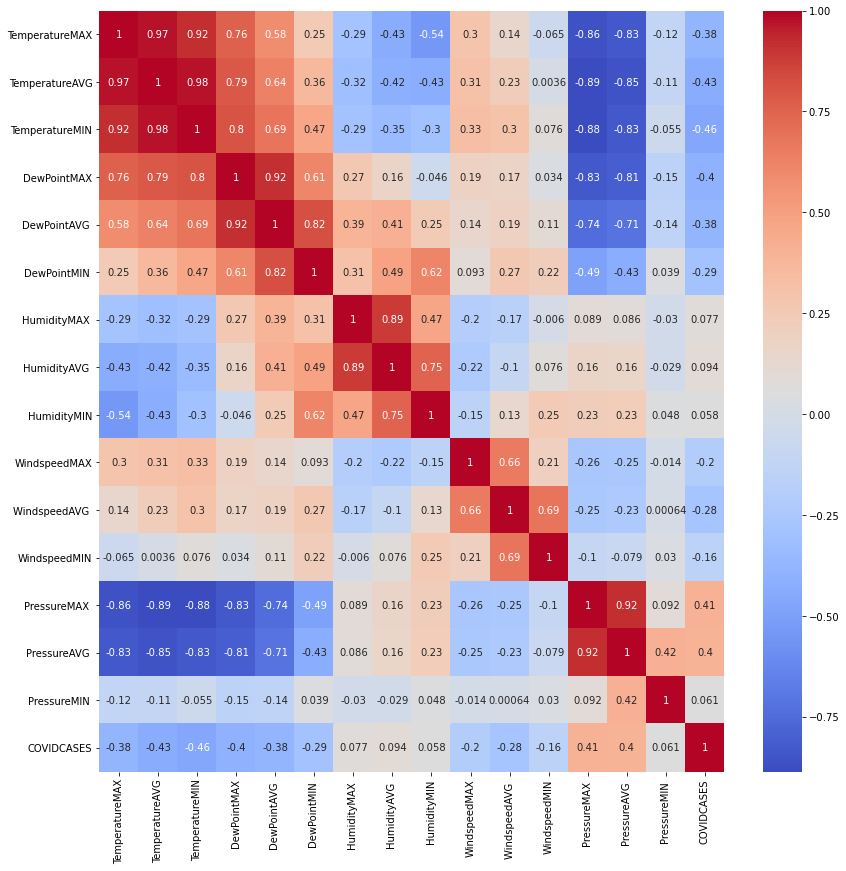

In [43]:
plt.figure(figsize=(14,14))
seaborn.heatmap(df.corr(), annot=True, cmap='coolwarm')

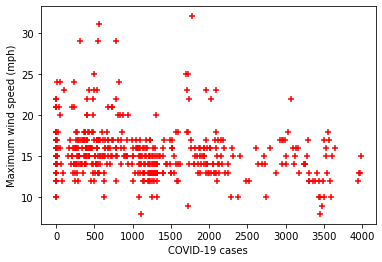

In [51]:
%matplotlib inline
plt.xlabel('COVID-19 cases')
plt.ylabel('Maximum wind speed (mph)')
plt.scatter(df.COVIDCASES,df.WindspeedMAX, color='red',marker='+')

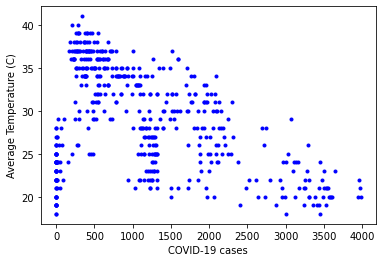

In [52]:
%matplotlib inline
plt.xlabel ('COVID-19 cases')
plt.ylabel('Average Temperature (C)')
plt.scatter (df.COVIDCASES, df.TemperatureAVG, color='blue', marker='.')

In [67]:
%matplotlib inline
plt.xlabel ('COVID-19 cases')
plt.ylabel('Maximum Humidity%')
plt.scatter(df.COVIDCASES, df.(HumidityMIN,HumidityMIN), color='black', marker='-')

SyntaxError: invalid syntax (<ipython-input-67-f3a5717e09f4>, line 4)

In [104]:
df.loc[df['TemperatureAVG']==24, ['TemperatureAVG', 'COVIDCASES']]

,TemperatureAVG,COVIDCASES
11,24,0.0
12,24,1.0
19,24,0.0
21,24,0.0
23,24,0.0
33,24,0.0
38,24,16.0
41,24,29.0
44,24,0.0
52,24,13.0


In [105]:
df.loc[428]

Date              4/1/2021
TemperatureMAX          32
TemperatureAVG          27
TemperatureMIN          21
DewPointMAX             70
DewPointAVG             63
DewPointMIN             41
HumidityMAX             88
HumidityAVG           60.8
HumidityMIN             18
WindspeedMAX            15
WindspeedAVG           6.5
WindspeedMIN             2
PressureMAX           29.9
PressureAVG           29.8
PressureMIN           29.8
COVIDCASES            2315
Name: 428, dtype: object

In [106]:
df.loc[421]

Date              3/25/2021
TemperatureMAX           37
TemperatureAVG           30
TemperatureMIN           24
DewPointMAX              63
DewPointAVG            53.9
DewPointMIN              43
HumidityMAX              61
HumidityAVG            34.8
HumidityMIN              15
WindspeedMAX             14
WindspeedAVG            9.8
WindspeedMIN              6
PressureMAX            29.9
PressureAVG            29.8
PressureMIN            29.8
COVIDCASES             2043
Name: 421, dtype: object

In [107]:
df.loc[405]

Date              3/9/2021
TemperatureMAX          30
TemperatureAVG          24
TemperatureMIN          18
DewPointMAX             63
DewPointAVG           50.4
DewPointMIN             18
HumidityMAX             83
HumidityAVG           52.1
HumidityMIN              8
WindspeedMAX            10
WindspeedAVG           5.7
WindspeedMIN             2
PressureMAX             30
PressureAVG           29.9
PressureMIN           29.9
COVIDCASES            2373
Name: 405, dtype: object

In [108]:
df.loc[398]

Date              3/2/2021
TemperatureMAX          33
TemperatureAVG          26
TemperatureMIN          21
DewPointMAX             61
DewPointAVG           55.4
DewPointMIN             50
HumidityMAX             64
HumidityAVG           45.6
HumidityMIN             24
WindspeedMAX            15
WindspeedAVG           7.5
WindspeedMIN             2
PressureMAX             30
PressureAVG             30
PressureMIN           29.9
COVIDCASES            2721
Name: 398, dtype: object

In [109]:
df.loc[411]

Date              3/15/2021
TemperatureMAX           27
TemperatureAVG           23
TemperatureMIN           20
DewPointMAX              63
DewPointAVG            60.6
DewPointMIN              57
HumidityMAX              78
HumidityAVG            64.8
HumidityMIN              48
WindspeedMAX             14
WindspeedAVG            7.1
WindspeedMIN              3
PressureMAX              30
PressureAVG            29.9
PressureMIN            29.8
COVIDCASES             1898
Name: 411, dtype: object

In [164]:
from sklearn.cluster import KMeans

In [165]:
kmeans= KMeans(n_clusters=4)

In [182]:
plt.scatter(df[0][:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [100]:
x=df.drop('COVIDCASES',axis=1).values
y=df['COVIDCASES'].values
print(x)
print(y)

[['1/29/2020' 24 20 ... 30.1 30.1 30.0]
 ['1/30/2020' 22 20 ... 30.1 30.1 30.0]
 ['1/31/2020' 23 18 ... 30.1 30.0 30.0]
 ...
 ['5/23/2021' 45 36 ... 29.6 29.6 29.5]
 ['5/24/2021' 44 37 ... 29.7 29.6 29.6]
 ['5/25/2021' 44 36 ... 29.7 29.6 29.6]]
[4.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 6.000e+00 2.000e+00 0.000e+00 0.000e+00 6.000e+00
 0.000e+00 2.000e+00 0.000e+00 1.600e+01 0.000e+00 0.000e+00 2.900e+01
 0.000e+00 1.100e+01 0.000e+00 0.000e+00 1.300e+01 0.000e+00 0.000e+00
 1.500e+01 2.700e+01 0.000e+00 1.300e+01 0.000e+00 4.500e+01 5.000e+01
 8.500e+01 0.000e+00 7.200e+01 6.300e+01 1.020e+02 4.100e+01 5.300e+01
 1.500e+02 2.100e+02 2.400e+02 2.410e+02 2.940e+02 2.770e+02 2.830e+02
 3.000e+02 3.310e+02 3.700e+02 3.760e+02 3.8

In [110]:
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt

names=df.drop('COVIDCASES',axis=1).columns

print(names)

Index(['Date', 'TemperatureMAX', 'TemperatureAVG', 'TemperatureMIN',
       'DewPointMAX', 'DewPointAVG ', 'DewPointMIN ', 'HumidityMAX ',
       'HumidityAVG ', 'HumidityMIN', 'WindspeedMAX', 'WindspeedAVG ',
       'WindspeedMIN', 'PressureMAX ', 'PressureAVG ', 'PressureMIN '],
      dtype='object')
